In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [3]:
data = pd.merge(ratings,movies, on="movieId")
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [4]:
genres = data['genres'].str.get_dummies(sep='|')
display(genres.head)

<bound method NDFrame.head of         (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                        0       0          0          0         0       0   
1                        0       0          0          0         0       0   
2                        0       0          0          0         0       0   
3                        0       0          0          0         0       0   
4                        0       0          0          0         0       0   
...                    ...     ...        ...        ...       ...     ...   
105334                   0       0          0          0         0       0   
105335                   0       0          0          0         0       0   
105336                   0       0          0          0         0       0   
105337                   0       0          0          0         0       0   
105338                   0       0          0          0         0       0   

        Crime  Documentary  Drama

In [5]:
user_stats = data.groupby('userId').agg({
    'rating':['mean','count','std']
}).reset_index()
display(user_stats.head())

userId    rating                
              mean count       std
0      1  3.628319   113  1.133458
1      2  3.896552    29  0.816999
2      3  3.794521    73  0.798591
3      4  4.161290   124  0.810371
4      5  3.183824    68  1.368364

In [6]:
data["label"] = data["rating"].apply(lambda x: 1 if x >= 4 else 0)

In [42]:
from sklearn.preprocessing import LabelEncoder
le_user =LabelEncoder()
le_movie = LabelEncoder()
data['user_encoded']= le_user.fit_transform(data['userId'])
data['movie_encoded']=le_movie.fit_transform(data['movieId'])
X = data[['user_encoded','movie_encoded']]
y = (data['rating'] >= 3.5).astype(int)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    token_pattern=r"\b\w+\b"
)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [45]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[5,10,15,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
data['label'].value_counts()

label
0    53416
1    51923
Name: count, dtype: int64

In [47]:
feature_cols = ['user_avg_rating', 'user_rating_count', 'user_rating_std',
                'movie_avg_rating', 'movie_rating_count'] + ratings.columns.tolist()

X = feature_cols     
y ='high_rating'

In [48]:
model = DecisionTreeClassifier(criterion='entropy',
    max_depth=5,           
    min_samples_split=10,  
    random_state=42 )
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curren

In [49]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6342794759825328
              precision    recall  f1-score   support

           0       0.67      0.10      0.18      8129
           1       0.63      0.97      0.76     12939

    accuracy                           0.63     21068
   macro avg       0.65      0.54      0.47     21068
weighted avg       0.65      0.63      0.54     21068



AttributeError: 'list' object has no attribute 'feature_names'

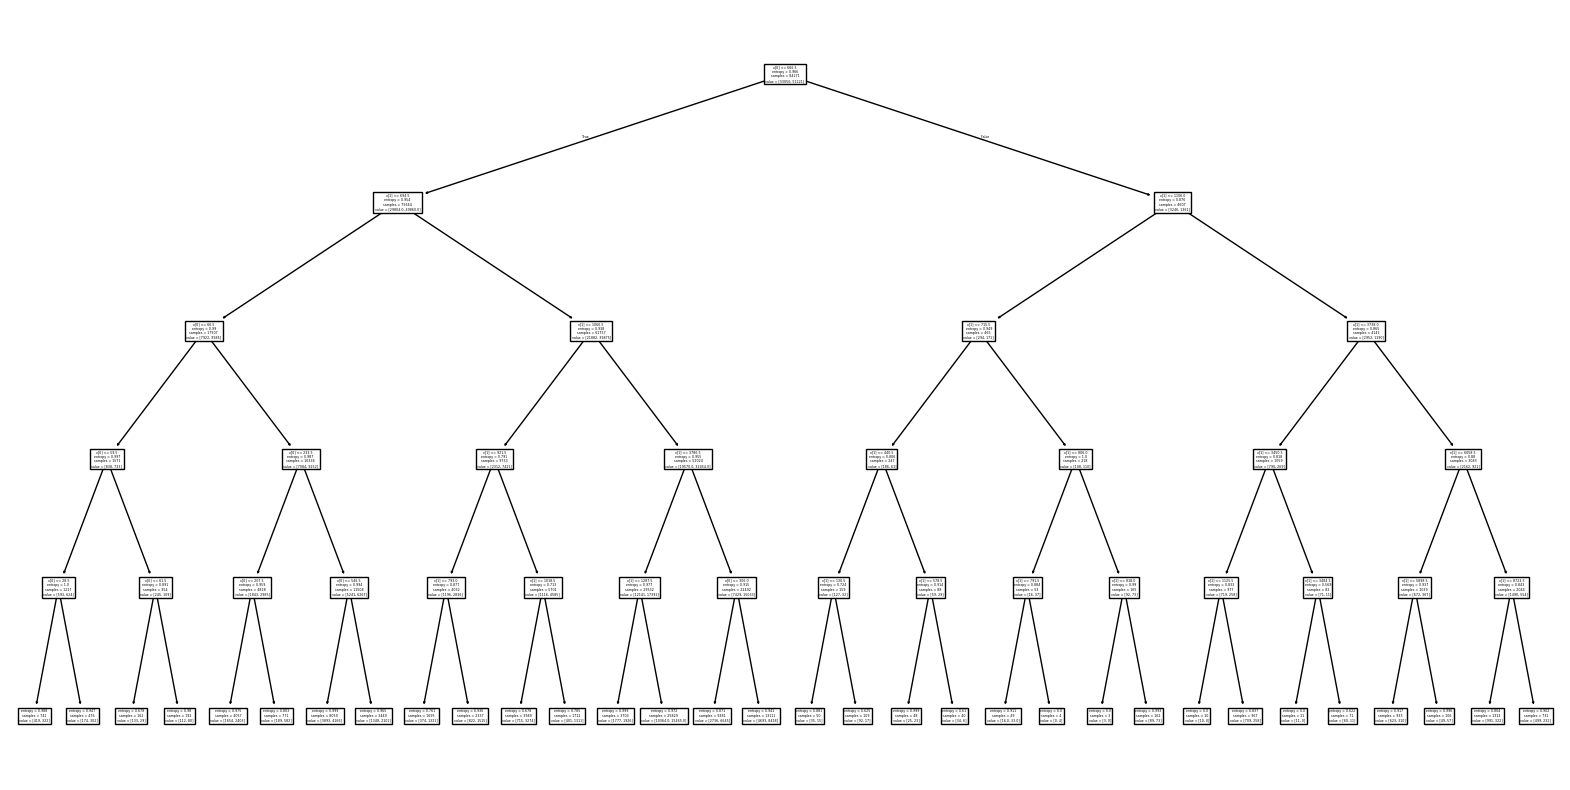

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plot_tree(
    model,
    feature_names=['user_encoded','movie_encoded'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()

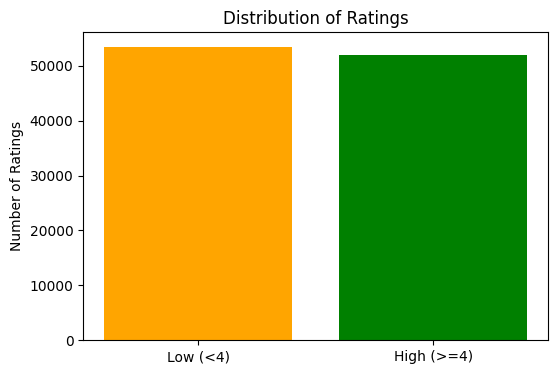

In [56]:
rating_counts =data["label"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(["Low (<4)","High (>=4)"],rating_counts, color=["orange","green"])
plt.title("Distribution of Ratings")
plt.ylabel("Number of Ratings")
plt.show()